# <font color='orange'>Numerical Exercise 6</font>

The purpose of this exercise is to simulate the $ 1D $ Classic Ising Model in a Statistical Mechanics scenario, taking into account a system of $ N = 50 $ spins with nearest neighbors interaction, described by the following Hamiltonian ($ \mu_B = k_B = 1 $):

$$ H\big[ \{ s_i \}_{i=1}^{N} \big] = -J\sum_{i=1}^N s_i s_{i+1} - \frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$

where $ \{ s_i \}_{i=1}^{N} $ are classical spin variables taking values in $ \{-1;1\} $, $ J>0 $ (*ferromagnetic* model), and with the periodic boundary conditions given by $ s_{N+1} = s_{1} $.<br>
Our interest is aimed at some observables per spin, such as the *Internal Energy*

$$
  \frac{U(N, T)}{N} = \frac{\langle H \rangle}{N} = 
                      \frac{1}{N} \frac{1}{Z} \sum_{\{ s_i \}} H e^{-\beta H}
$$

the *Heat Capacity*

$$
  \frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T}  =
  \beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

the *Magnetization* (with $ h \neq 0 $, otherwise $ M(N,T)_{{\big \vert}_{h = 0}} = \langle \sum_{i=1}^{N}s_i \rangle = 0 $)

$$
  M(N,T,h) = T \dfrac{\partial \ln Z}{\partial h} = \Big \langle \sum_{i=1}^{N}s_i \Big \rangle
$$

and finally the *Magnetic Susceptibility*

$$
  \chi(N,T) = \frac{\partial M}{\partial h} = \beta \ \left[ \left\langle \left( \sum_{i=1}^{N}s_i 
  \right)^2 \right\rangle - \left\langle \sum_{i=1}^{N}s_i \right\rangle^2 \right]
$$

It is clear from the equations listed above that to calculate the thermodynamic properties as expected values related to a certain probability density, it is essential to be able to sample the usual *Boltzmann weight* 

$$
      p \big( \{ s_i \}_{i=1}^{N} \big) = \frac{1}{Z} e^{-\beta H} \\
  Z = \sum_{\{ s_i \}} e^{-\beta H}
$$

This is generally a difficult task, as it is typically almost impossible to calculate the normalization of this density, i.e. the *partition function* $ Z $ of the system, as obtainable through an $ n $-dimensional integral, with $ n $ very large, and simple methods such as the inversion of the cumulative function are not adequate, given the shape of $ p(\{ s_i \}) $.
In this situation emerges the power of the *Metropolis algorithm*, which we want to exploit to sample the Boltzmann weight and study the statistical properties of our spin model.

## <font color='blue'>Exercise 06.1</font>

As in the case of Molecular Dynamics (<font color='orange'> Numerical Exercise 4 </font>), the code provided implements as starting point of the simulation a random configuration of the $ N $ Ising spins; therefore the first improvement that is suggested is to add the possibility to restart from the last spin configuration related to a previous simulation at the same temperature: this allows to equilibrate the system bringing it to the target temperature, before making the actual thermodynamic measurements.

The second step of the exercise is to implement two different sampling methods of the Boltzmann weight:

1. **Metropolis sampling algorithm** <br>
    I choose randomly a spin $ s_{o} $ and compute its energy
    
    $$ energy_{old} = H[s_o] = -J s_o \big( s_{o-1} + s_{o+1} \big) - h s_o $$
    
    Then I try to flip this spin, considering the energy
    
    $$ energy_{new} = H[-s_o] $$
    
    and correcting this move with the acceptance probability strategy: if the ratio of the two probability 
    
    $$ \frac{p(-s_o)}{p(s_o)} = \frac{e^{-\beta \ energy_{new}}}{e^{-\beta \ energy_{old}}} $$
    
    is greater than a random uniformly distributed number, I take the move and flip the spin; otherwise I leave
    the spin as it is.<br>
    I repeat this procedure $ N=50 $ times, in the attempt to move, on average, all the spins that make up the 
    system.
    Note that taking into account the ratio between the two Boltzmann weights I do not need to calculate the
    normalization $ Z $, which simplifies (this is the real advantage of the Metropolis algorithm).


2. **Gibbs sampling method** <br>
    In practice this method can be seen as a particular case of the above Metropolis algorithm, where the
    proposed move is always accepted. In fact, in this case I always randomly choose one of the spins $ s_o $ 
    in the system, but instead of proposing a flip, I decide to set $ s_o = +1 $ (up) or $ s_o = -1 $ (down) 
    according to the value of the conditional probability
    
    $$ 
      p\big( s_o=+1 \ \big \vert \ s_o=-1 \big) = \frac{p(s_o = +1)}{p(s_o = +1) + p(s_o = -1)} = 
      \frac{e^{-\beta H[s_o = +1]}}{e^{-\beta H[s_o = +1]} + e^{-\beta H[s_o = -1]}}
    $$
    
    greater or smaller than a random number uniformly distributed.
    I repeat this procedure $ N=50 $ times as before.
    
At this point the simulation consists in equilibrating the system at a given temperature, moving the spins with one of the two algorithms just presented, and calculating, throughout the sampled configurations, the following quantities ($ J = 1 $):

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = \beta^2 \ \big(\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2 \big)$ 
3. $\chi(N,T) = \beta \ \Big\langle \big(\sum_{i=1}^{N}s_i \big)^2 \Big \rangle_{h=0}$
4. $M(N,T,h=0.02)= \big\langle \sum_{i=1}^{N}s_i \big\rangle_{h=0.02}$

repeating these steps $ M = 10^6 $ and using data blocking ($ N_{blk} = 10^2 $) for the estimate of the statistical uncertainties.<br>
I study the system at temperatures $ [0.25, 0.50, 0.75, 1.0, 1.25, 1.50, 1.75, 2.0, 2.25, 2.50, 2.75, 3.0] $, both sampling the Boltzmann weight with the Metropolis and the Gibbs algorithm, and compare the thermodynamic quantity (as a function of temperature) thus obtained with the exact curves related to the analytical solution of the model; I  decide to plot the last value (obtained using all the blocks), with the relative uncertainty, for each of the temperatures.<br>
The following graphs show my results.

In [1]:
#Modules
from math import pi, sqrt, cosh, tanh, sinh, exp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
#In the case of single graphs in the figure
#I set the central alignment
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
#####################
#load the data
#####################
points=100
T=np.linspace(0.2,3.0,num=points)
temp=np.array([0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])  #simulated temperatures
beta=1/T
b = 1/T

J=1.0
Ns=50
h=0.02 #external field
n_blk=100
N_blk=np.loadtxt("06.1/T_0.25/Metro_0/output.ene.dat", usecols=(0), unpack=True)

###
#Internal Energy
###
#Analytic Solution
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
#Metropolis Algorithm
e025_metro, e025_metro_err = np.loadtxt("06.1/T_0.25/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e05_metro, e05_metro_err = np.loadtxt("06.1/T_0.5/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e075_metro, e075_metro_err = np.loadtxt("06.1/T_0.75/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e1_metro, e1_metro_err = np.loadtxt("06.1/T_1.0/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e125_metro, e125_metro_err = np.loadtxt("06.1/T_1.25/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e15_metro, e15_metro_err = np.loadtxt("06.1/T_1.5/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e175_metro, e175_metro_err = np.loadtxt("06.1/T_1.75/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e2_metro, e2_metro_err = np.loadtxt("06.1/T_2.0/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e225_metro, e225_metro_err = np.loadtxt("06.1/T_2.25/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e25_metro, e25_metro_err = np.loadtxt("06.1/T_2.5/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e275_metro, e275_metro_err = np.loadtxt("06.1/T_2.75/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
e3_metro, e3_metro_err = np.loadtxt("06.1/T_3.0/Metro_0/output.ene.dat", usecols=(2, 3), unpack=True)
#Gibbs Algortithm
e025_gibbs, e025_gibbs_err = np.loadtxt("06.1/T_0.25/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e05_gibbs, e05_gibbs_err = np.loadtxt("06.1/T_0.5/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e075_gibbs, e075_gibbs_err = np.loadtxt("06.1/T_0.75/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e1_gibbs, e1_gibbs_err = np.loadtxt("06.1/T_1.0/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e125_gibbs, e125_gibbs_err = np.loadtxt("06.1/T_1.25/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e15_gibbs, e15_gibbs_err = np.loadtxt("06.1/T_1.5/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e175_gibbs, e175_gibbs_err = np.loadtxt("06.1/T_1.75/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e2_gibbs, e2_gibbs_err = np.loadtxt("06.1/T_2.0/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e225_gibbs, e225_gibbs_err = np.loadtxt("06.1/T_2.25/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e25_gibbs, e25_gibbs_err = np.loadtxt("06.1/T_2.5/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e275_gibbs, e275_gibbs_err = np.loadtxt("06.1/T_2.75/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
e3_gibbs, e3_gibbs_err = np.loadtxt("06.1/T_3.0/Gibbs_0/output.ene.dat", usecols=(2, 3), unpack=True)
 

###
#Heat Capacity
###
#Analytic Solution
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#Metropolis Algorithm
heat025_metro, heat025_metro_err = np.loadtxt("06.1/T_0.25/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat05_metro, heat05_metro_err = np.loadtxt("06.1/T_0.5/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat075_metro, heat075_metro_err = np.loadtxt("06.1/T_0.75/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat1_metro, heat1_metro_err = np.loadtxt("06.1/T_1.0/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat125_metro, heat125_metro_err = np.loadtxt("06.1/T_1.25/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat15_metro, heat15_metro_err = np.loadtxt("06.1/T_1.5/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat175_metro, heat175_metro_err = np.loadtxt("06.1/T_1.75/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat2_metro, heat2_metro_err = np.loadtxt("06.1/T_2.0/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat225_metro, heat225_metro_err = np.loadtxt("06.1/T_2.25/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat25_metro, heat25_metro_err = np.loadtxt("06.1/T_2.5/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat275_metro, heat275_metro_err = np.loadtxt("06.1/T_2.75/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat3_metro, heat3_metro_err = np.loadtxt("06.1/T_3.0/Metro_0/output.heat.dat", usecols=(2, 3), unpack=True)
#Gibbs Algortithm
heat025_gibbs, heat025_gibbs_err = np.loadtxt("06.1/T_0.25/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat05_gibbs, heat05_gibbs_err = np.loadtxt("06.1/T_0.5/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat075_gibbs, heat075_gibbs_err = np.loadtxt("06.1/T_0.75/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat1_gibbs, heat1_gibbs_err = np.loadtxt("06.1/T_1.0/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat125_gibbs, heat125_gibbs_err = np.loadtxt("06.1/T_1.25/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat15_gibbs, heat15_gibbs_err = np.loadtxt("06.1/T_1.5/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat175_gibbs, heat175_gibbs_err = np.loadtxt("06.1/T_1.75/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat2_gibbs, heat2_gibbs_err = np.loadtxt("06.1/T_2.0/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat225_gibbs, heat225_gibbs_err = np.loadtxt("06.1/T_2.25/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat25_gibbs, heat25_gibbs_err = np.loadtxt("06.1/T_2.5/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat275_gibbs, heat275_gibbs_err = np.loadtxt("06.1/T_2.75/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)
heat3_gibbs, heat3_gibbs_err = np.loadtxt("06.1/T_3.0/Gibbs_0/output.heat.dat", usecols=(2, 3), unpack=True)


###
#Magnetization
###
#Analytic Solution
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
#Metropolis Algorithm
m025_metro, m025_metro_err = np.loadtxt("06.1/T_0.25/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m05_metro, m05_metro_err = np.loadtxt("06.1/T_0.5/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m075_metro, m075_metro_err = np.loadtxt("06.1/T_0.75/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m1_metro, m1_metro_err = np.loadtxt("06.1/T_1.0/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m125_metro, m125_metro_err = np.loadtxt("06.1/T_1.25/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m15_metro, m15_metro_err = np.loadtxt("06.1/T_1.5/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m175_metro, m175_metro_err = np.loadtxt("06.1/T_1.75/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m2_metro, m2_metro_err = np.loadtxt("06.1/T_2.0/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m225_metro, m225_metro_err = np.loadtxt("06.1/T_2.25/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m25_metro, m25_metro_err = np.loadtxt("06.1/T_2.5/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m275_metro, m275_metro_err = np.loadtxt("06.1/T_2.75/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
m3_metro, m3_metro_err = np.loadtxt("06.1/T_3.0/Metro_h/output.mag.dat", usecols=(2, 3), unpack=True)
#Gibbs Algortithm
m025_gibbs, m025_gibbs_err = np.loadtxt("06.1/T_0.25/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m05_gibbs, m05_gibbs_err = np.loadtxt("06.1/T_0.5/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m075_gibbs, m075_gibbs_err = np.loadtxt("06.1/T_0.75/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m1_gibbs, m1_gibbs_err = np.loadtxt("06.1/T_1.0/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m125_gibbs, m125_gibbs_err = np.loadtxt("06.1/T_1.25/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m15_gibbs, m15_gibbs_err = np.loadtxt("06.1/T_1.5/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m175_gibbs, m175_gibbs_err = np.loadtxt("06.1/T_1.75/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m2_gibbs, m2_gibbs_err = np.loadtxt("06.1/T_2.0/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m225_gibbs, m225_gibbs_err = np.loadtxt("06.1/T_2.25/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m25_gibbs, m25_gibbs_err = np.loadtxt("06.1/T_2.5/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m275_gibbs, m275_gibbs_err = np.loadtxt("06.1/T_2.75/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)
m3_gibbs, m3_gibbs_err = np.loadtxt("06.1/T_3.0/Gibbs_h/output.mag.dat", usecols=(2, 3), unpack=True)


###
#Susceptibility
###
#Analytic Solution
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
#Metropolis Algorithm
chi025_metro, chi025_metro_err = np.loadtxt("06.1/T_0.25/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi05_metro, chi05_metro_err = np.loadtxt("06.1/T_0.5/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi075_metro, chi075_metro_err = np.loadtxt("06.1/T_0.75/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi1_metro, chi1_metro_err = np.loadtxt("06.1/T_1.0/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi125_metro, chi125_metro_err = np.loadtxt("06.1/T_1.25/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi15_metro, chi15_metro_err = np.loadtxt("06.1/T_1.5/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi175_metro, chi175_metro_err = np.loadtxt("06.1/T_1.75/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi2_metro, chi2_metro_err = np.loadtxt("06.1/T_2.0/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi225_metro, chi225_metro_err = np.loadtxt("06.1/T_2.25/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi25_metro, chi25_metro_err = np.loadtxt("06.1/T_2.5/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi275_metro, chi275_metro_err = np.loadtxt("06.1/T_2.75/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi3_metro, chi3_metro_err = np.loadtxt("06.1/T_3.0/Metro_0/output.chi.dat", usecols=(2, 3), unpack=True)
#Gibbs Algortithm
chi025_gibbs, chi025_gibbs_err = np.loadtxt("06.1/T_0.25/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi05_gibbs, chi05_gibbs_err = np.loadtxt("06.1/T_0.5/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi075_gibbs, chi075_gibbs_err = np.loadtxt("06.1/T_0.75/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi1_gibbs, chi1_gibbs_err = np.loadtxt("06.1/T_1.0/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi125_gibbs, chi125_gibbs_err = np.loadtxt("06.1/T_1.25/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi15_gibbs, chi15_gibbs_err = np.loadtxt("06.1/T_1.5/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi175_gibbs, chi175_gibbs_err = np.loadtxt("06.1/T_1.75/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi2_gibbs, chi2_gibbs_err = np.loadtxt("06.1/T_2.0/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi225_gibbs, chi225_gibbs_err = np.loadtxt("06.1/T_2.25/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi25_gibbs, chi25_gibbs_err = np.loadtxt("06.1/T_2.5/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi275_gibbs, chi275_gibbs_err = np.loadtxt("06.1/T_2.75/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)
chi3_gibbs, chi3_gibbs_err = np.loadtxt("06.1/T_3.0/Gibbs_0/output.chi.dat", usecols=(2, 3), unpack=True)


###
#Target
###
#Internal Energy
e_metro = [e025_metro[n_blk-1], e05_metro[n_blk-1], e075_metro[n_blk-1], e1_metro[n_blk-1], 
           e125_metro[n_blk-1], e15_metro[n_blk-1], e175_metro[n_blk-1], e2_metro[n_blk-1],
           e225_metro[n_blk-1], e25_metro[n_blk-1], e275_metro[n_blk-1], e3_metro[n_blk-1]]
e_metro_err = [e025_metro_err[n_blk-1], e05_metro_err[n_blk-1], e075_metro_err[n_blk-1], e1_metro_err[n_blk-1], 
               e125_metro_err[n_blk-1], e15_metro_err[n_blk-1], e175_metro_err[n_blk-1], e2_metro_err[n_blk-1], 
               e225_metro_err[n_blk-1], e25_metro_err[n_blk-1], e275_metro_err[n_blk-1], e3_metro_err[n_blk-1]]

e_gibbs = [e025_gibbs[n_blk-1], e05_gibbs[n_blk-1], e075_gibbs[n_blk-1], e1_gibbs[n_blk-1], 
           e125_gibbs[n_blk-1], e15_gibbs[n_blk-1], e175_gibbs[n_blk-1], e2_gibbs[n_blk-1],
           e225_gibbs[n_blk-1], e25_gibbs[n_blk-1], e275_gibbs[n_blk-1], e3_gibbs[n_blk-1]]
e_gibbs_err = [e025_gibbs_err[n_blk-1], e05_gibbs_err[n_blk-1], e075_gibbs_err[n_blk-1], e1_gibbs_err[n_blk-1], 
               e125_gibbs_err[n_blk-1], e15_gibbs_err[n_blk-1], e175_gibbs_err[n_blk-1], e2_gibbs_err[n_blk-1],
               e225_gibbs_err[n_blk-1], e25_gibbs_err[n_blk-1], e275_gibbs_err[n_blk-1], e3_gibbs_err[n_blk-1]]

#Capacity Heat
heat_metro = [heat025_metro[n_blk-1], heat05_metro[n_blk-1], heat075_metro[n_blk-1], heat1_metro[n_blk-1], 
              heat125_metro[n_blk-1], heat15_metro[n_blk-1], heat175_metro[n_blk-1], heat2_metro[n_blk-1],
              heat225_metro[n_blk-1], heat25_metro[n_blk-1], heat275_metro[n_blk-1], heat3_metro[n_blk-1]]
heat_metro_err = [heat025_metro_err[n_blk-1], heat05_metro_err[n_blk-1], heat075_metro_err[n_blk-1], heat1_metro_err[n_blk-1], 
                  heat125_metro_err[n_blk-1], heat15_metro_err[n_blk-1], heat175_metro_err[n_blk-1], heat2_metro_err[n_blk-1], 
                  heat225_metro_err[n_blk-1], heat25_metro_err[n_blk-1], heat275_metro_err[n_blk-1], heat3_metro_err[n_blk-1]]

heat_gibbs = [heat025_gibbs[n_blk-1], heat05_gibbs[n_blk-1], heat075_gibbs[n_blk-1], heat1_gibbs[n_blk-1], 
              heat125_gibbs[n_blk-1], heat15_gibbs[n_blk-1], heat175_gibbs[n_blk-1], heat2_gibbs[n_blk-1],
              heat225_gibbs[n_blk-1], heat25_gibbs[n_blk-1], heat275_gibbs[n_blk-1], heat3_gibbs[n_blk-1]]
heat_gibbs_err = [heat025_gibbs_err[n_blk-1], heat05_gibbs_err[n_blk-1], heat075_gibbs_err[n_blk-1], heat1_gibbs_err[n_blk-1], 
                  heat125_gibbs_err[n_blk-1], heat15_gibbs_err[n_blk-1], heat175_gibbs_err[n_blk-1], heat2_gibbs_err[n_blk-1],
                  heat225_gibbs_err[n_blk-1], heat25_gibbs_err[n_blk-1], heat275_gibbs_err[n_blk-1], heat3_gibbs_err[n_blk-1]]

#Magnetization
m_metro = [m025_metro[n_blk-1], m05_metro[n_blk-1], m075_metro[n_blk-1], m1_metro[n_blk-1], 
           m125_metro[n_blk-1], m15_metro[n_blk-1], m175_metro[n_blk-1], m2_metro[n_blk-1],
           m225_metro[n_blk-1], m25_metro[n_blk-1], m275_metro[n_blk-1], m3_metro[n_blk-1]]
m_metro_err = [m025_metro_err[n_blk-1], m05_metro_err[n_blk-1], m075_metro_err[n_blk-1], m1_metro_err[n_blk-1], 
               m125_metro_err[n_blk-1], m15_metro_err[n_blk-1], m175_metro_err[n_blk-1], m2_metro_err[n_blk-1], 
               m225_metro_err[n_blk-1], m25_metro_err[n_blk-1], m275_metro_err[n_blk-1], m3_metro_err[n_blk-1]]

m_gibbs = [m025_gibbs[n_blk-1], m05_gibbs[n_blk-1], m075_gibbs[n_blk-1], m1_gibbs[n_blk-1], 
           m125_gibbs[n_blk-1], m15_gibbs[n_blk-1], m175_gibbs[n_blk-1], m2_gibbs[n_blk-1],
           m225_gibbs[n_blk-1], m25_gibbs[n_blk-1], m275_gibbs[n_blk-1], m3_gibbs[n_blk-1]]
m_gibbs_err = [m025_gibbs_err[n_blk-1], m05_gibbs_err[n_blk-1], m075_gibbs_err[n_blk-1], m1_gibbs_err[n_blk-1], 
               m125_gibbs_err[n_blk-1], m15_gibbs_err[n_blk-1], m175_gibbs_err[n_blk-1], m2_gibbs_err[n_blk-1],
               m225_gibbs_err[n_blk-1], m25_gibbs_err[n_blk-1], m275_gibbs_err[n_blk-1], m3_gibbs_err[n_blk-1]]

#Susceptibility
chi_metro = [chi025_metro[n_blk-1], chi05_metro[n_blk-1], chi075_metro[n_blk-1], chi1_metro[n_blk-1], 
           chi125_metro[n_blk-1], chi15_metro[n_blk-1], chi175_metro[n_blk-1], chi2_metro[n_blk-1],
           chi225_metro[n_blk-1], chi25_metro[n_blk-1], chi275_metro[n_blk-1], chi3_metro[n_blk-1]]
chi_metro_err = [chi025_metro_err[n_blk-1], chi05_metro_err[n_blk-1], chi075_metro_err[n_blk-1], chi1_metro_err[n_blk-1], 
               chi125_metro_err[n_blk-1], chi15_metro_err[n_blk-1], chi175_metro_err[n_blk-1], chi2_metro_err[n_blk-1], 
               chi225_metro_err[n_blk-1], chi25_metro_err[n_blk-1], chi275_metro_err[n_blk-1], chi3_metro_err[n_blk-1]]

chi_gibbs = [chi025_gibbs[n_blk-1], chi05_gibbs[n_blk-1], chi075_gibbs[n_blk-1], chi1_gibbs[n_blk-1], 
             chi125_gibbs[n_blk-1], chi15_gibbs[n_blk-1], chi175_gibbs[n_blk-1], chi2_gibbs[n_blk-1],
             chi225_gibbs[n_blk-1], chi25_gibbs[n_blk-1], chi275_gibbs[n_blk-1], chi3_gibbs[n_blk-1]]
chi_gibbs_err = [chi025_gibbs_err[n_blk-1], chi05_gibbs_err[n_blk-1], chi075_gibbs_err[n_blk-1], chi1_gibbs_err[n_blk-1], 
                 chi125_gibbs_err[n_blk-1], chi15_gibbs_err[n_blk-1], chi175_gibbs_err[n_blk-1], chi2_gibbs_err[n_blk-1],
                 chi225_gibbs_err[n_blk-1], chi25_gibbs_err[n_blk-1], chi275_gibbs_err[n_blk-1], chi3_gibbs_err[n_blk-1]]

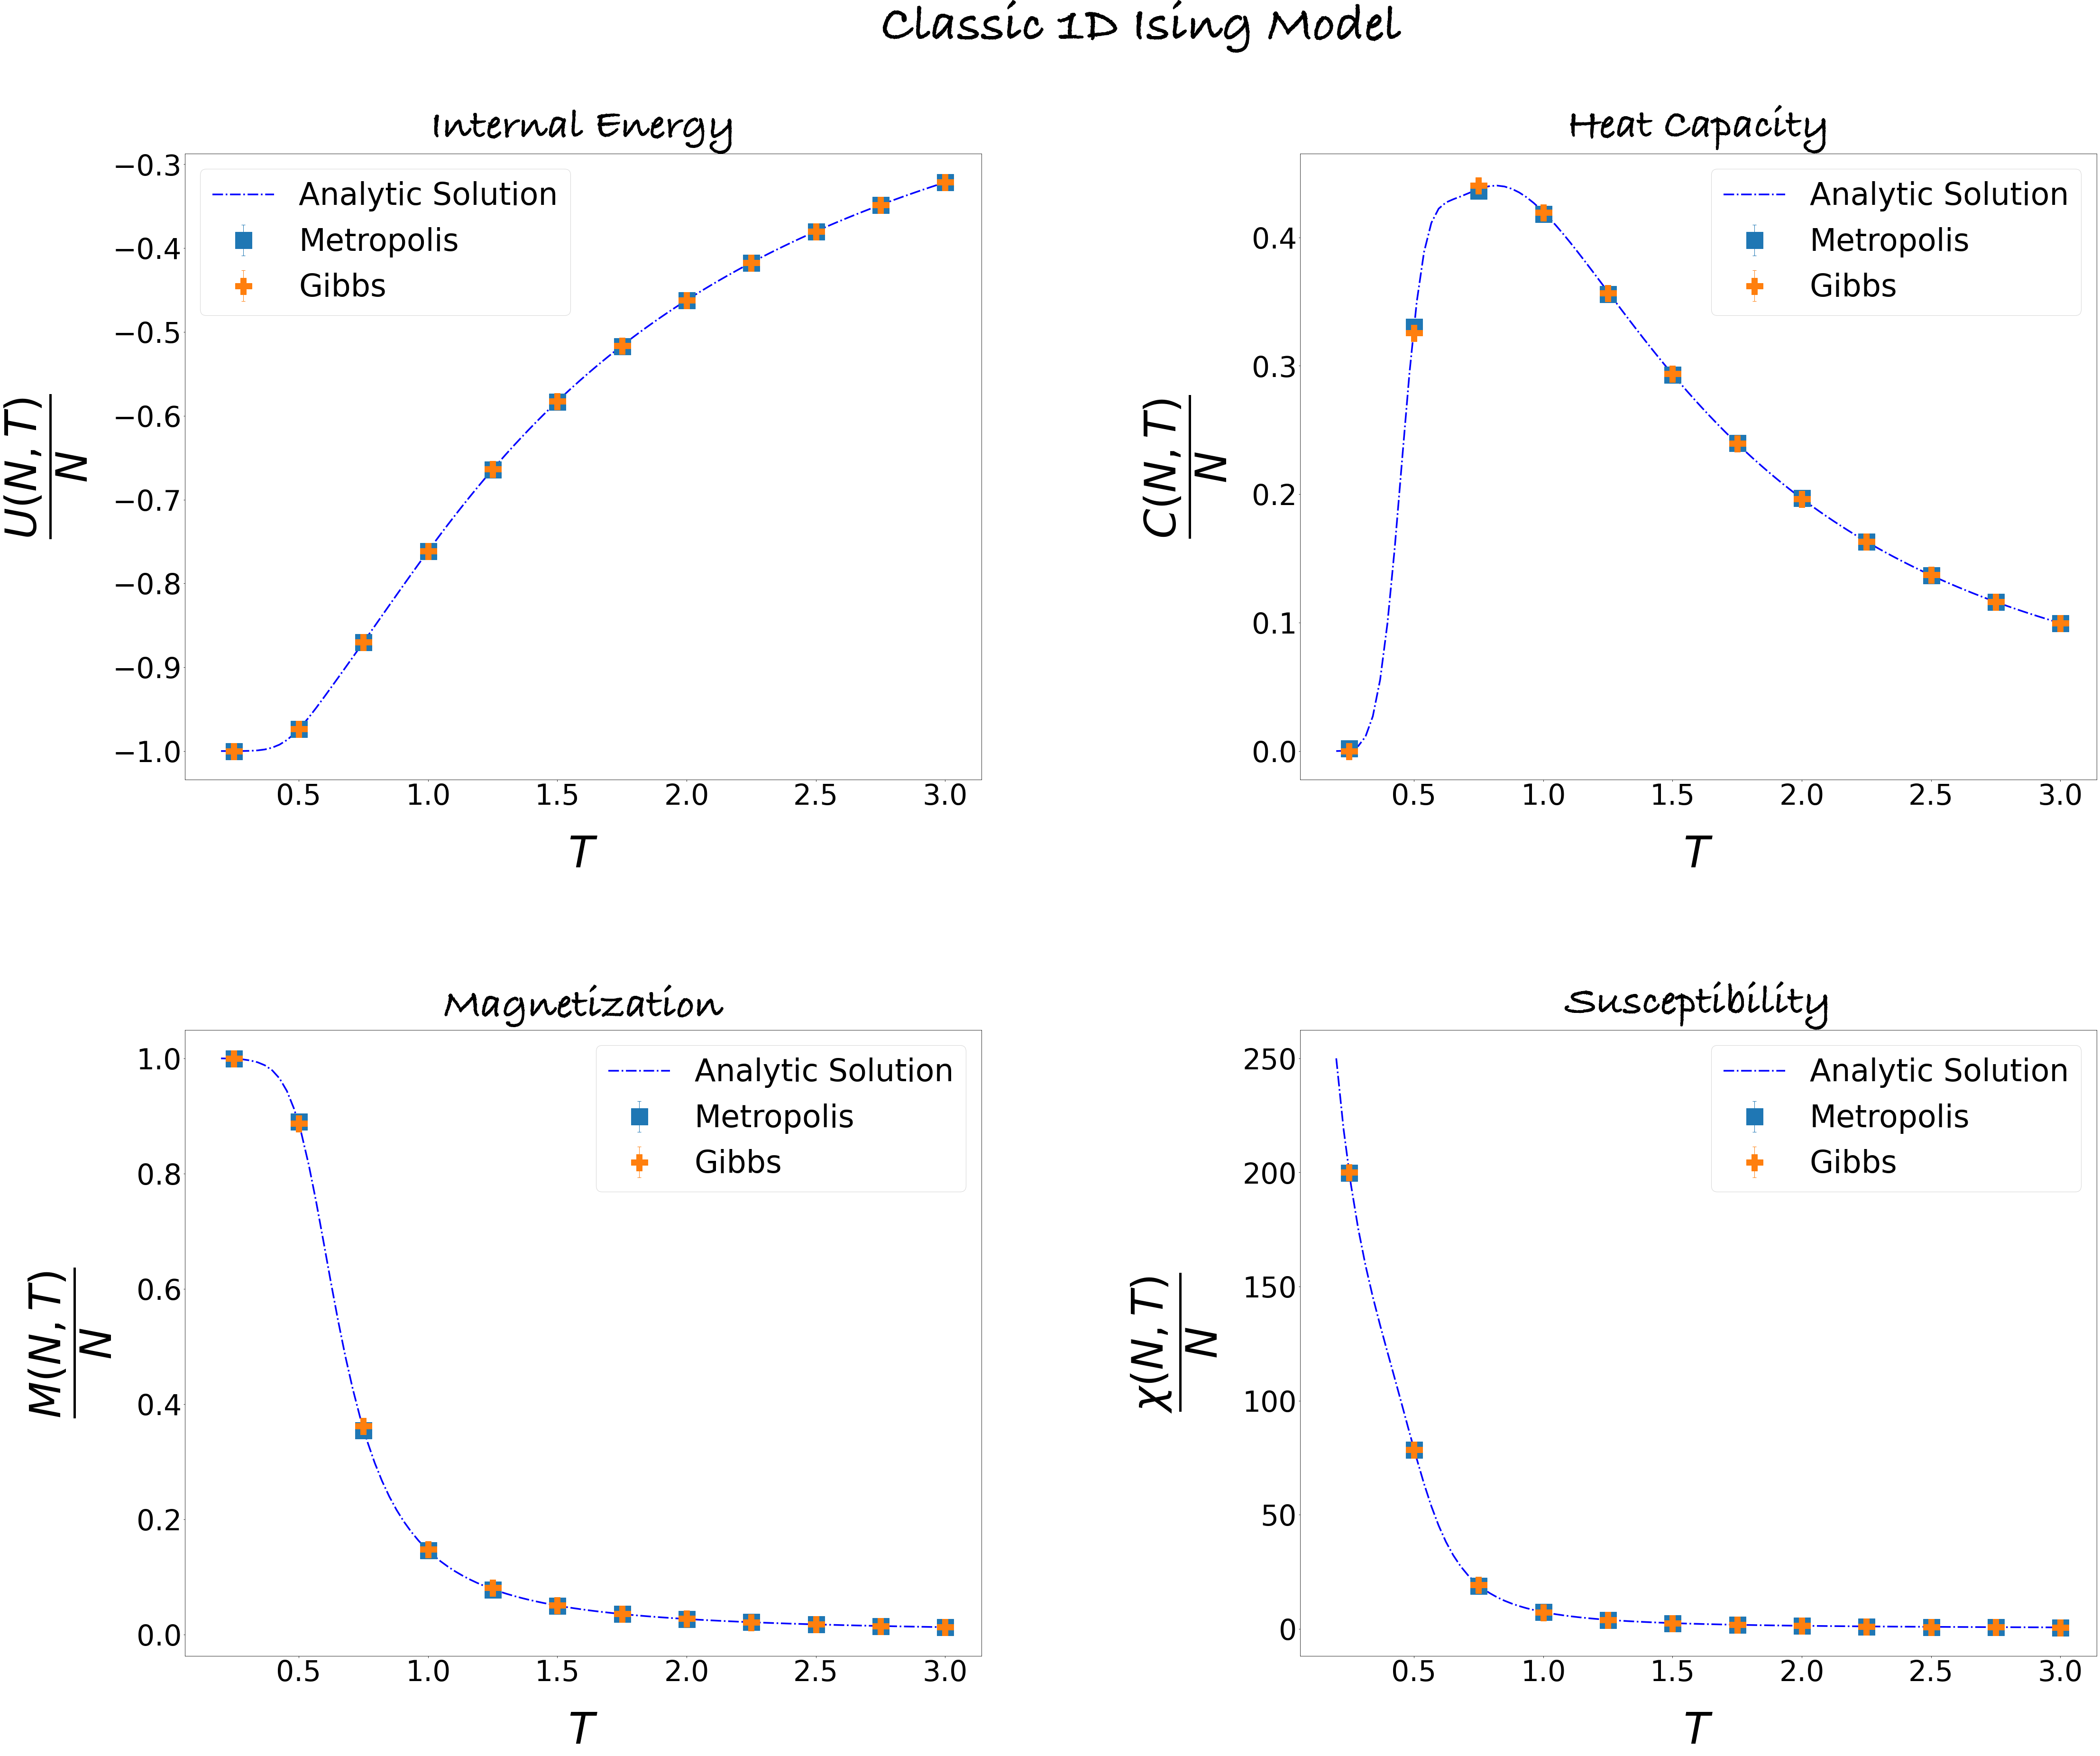

In [4]:
###############
#plots
###############
plt.figure(figsize=[70, 55]) #deafult (6.4,4.8)
plt.suptitle('Classic 1D Ising Model', fontname = 'Bradley Hand', fontsize=110)


###
#Internal Energy
###
plt.subplot(2, 2, 1)
plt.title('Internal Energy', fontname = 'Bradley Hand', fontsize=90)
plt.plot(T, e, linestyle='dashdot', lw=3.5, color='blue', label='Analytic Solution')
plt.errorbar(temp, e_metro, yerr=e_metro_err, fmt='s', elinewidth=1.,
             markersize=35, capsize=4, label='Metropolis')
plt.errorbar(temp, e_gibbs, yerr=e_gibbs_err, fmt='P', elinewidth=1.,
             markersize=35, capsize=4, label='Gibbs')
plt.xlabel('$T$', fontsize=90, labelpad=50)
plt.ylabel('$\dfrac{U(N,T)}{N}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.legend(fontsize=65, loc='best')


###
#Capacity Heat
###
plt.subplot(2, 2, 2)
plt.title('Heat Capacity', fontname = 'Bradley Hand', fontsize=90)
plt.plot(T, heat, linestyle='dashdot', lw=3.5, color='blue', label='Analytic Solution')
plt.errorbar(temp, heat_metro, yerr=heat_metro_err, fmt='s', elinewidth=1.,
             markersize=35, capsize=4, label='Metropolis')
plt.errorbar(temp, heat_gibbs, yerr=heat_gibbs_err, fmt='P', elinewidth=1.,
             markersize=35, capsize=4, label='Gibbs')
plt.xlabel('$T$', fontsize=90, labelpad=50)
plt.ylabel('$\dfrac{C(N,T)}{N}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.legend(fontsize=65, loc='best')


###
#Magnetization
###
plt.subplot(2, 2, 3)
plt.title('Magnetization', fontname = 'Bradley Hand', fontsize=90)
plt.plot(T, M, linestyle='dashdot', lw=3.5, color='blue', label='Analytic Solution')
plt.errorbar(temp, m_metro, yerr=m_metro_err, fmt='s', elinewidth=1.,
             markersize=35, capsize=4, label='Metropolis')
plt.errorbar(temp, m_gibbs, yerr=m_gibbs_err, fmt='P', elinewidth=1.,
             markersize=35, capsize=4, label='Gibbs')
plt.xlabel('$T$', fontsize=90, labelpad=50)
plt.ylabel('$\dfrac{M(N,T)}{N}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.legend(fontsize=65, loc='best')


###
#Susceptibility
###
plt.subplot(2, 2, 4)
plt.title('Susceptibility', fontname = 'Bradley Hand', fontsize=90)
plt.plot(T, X, linestyle='dashdot', lw=3.5, color='blue', label='Analytic Solution')
plt.errorbar(temp, chi_metro, yerr=chi_metro_err, fmt='s', elinewidth=1.,
             markersize=35, capsize=4, label='Metropolis')
plt.errorbar(temp, chi_gibbs, yerr=chi_gibbs_err, fmt='P', elinewidth=1.,
             markersize=35, capsize=4, label='Gibbs')
plt.xlabel('$T$', fontsize=90, labelpad=50)
plt.ylabel('$\dfrac{\chi(N,T)}{N}$', fontsize=90, labelpad=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.legend(fontsize=65, loc='best')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

Estimates made through the stochastic sampling of Boltzmann weight appear to be in accordance with the analytical solutions for both methods used, although the computed uncertainties are so small that the error bars would be completely covered by the points themselves, so I have not bothered to put them in the figure.